# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [2]:
# Preview the dataset
data.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot this time series data. 

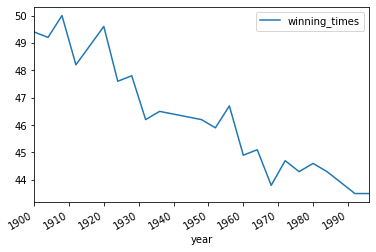

In [3]:
# Plot the time series
data.plot()

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [8]:
# Difference the time series
data_diff = data.diff(periods = 1)
data_diff.dropna(inplace = True)

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

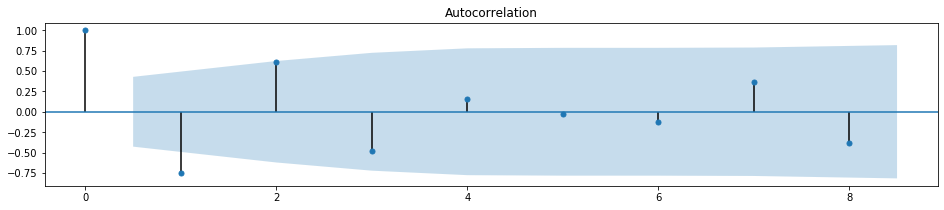

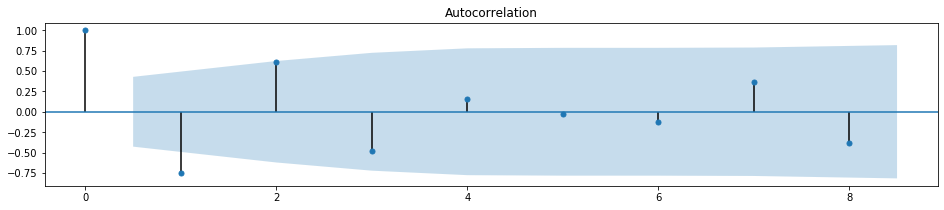

In [28]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(16,3))

plot_acf(data_diff, ax=ax, lags = 8)

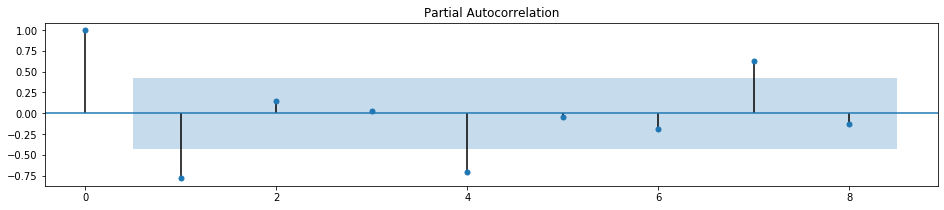

In [27]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(16,3))

plot_pacf(data_diff,ax=ax, lags = 8);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [31]:
from statsmodels.tsa.arima_model import ARMA

In [38]:
mod1 = ARMA(data_diff, order = (1,3))
arma1 = mod1.fit()
arma1.summary()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 3)   Log Likelihood                 -16.392
Method:                       css-mle   S.D. of innovations              0.452
Date:                Tue, 09 Jun 2020   AIC                             44.783
Time:                        18:53:30   BIC                             51.050
Sample:                             0   HQIC                            46.143
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3050      0.031     -9.972      0.000      -0.365      -0.245
ar.L1.winning_times     0.1102      0.274      0.402      0.693      -0.427       0.648
ma.L1.winning_times    -0.9898      0.228     -4.336      0.001      -1.437      -0.542
ma.L2.winning_times     0.9898      0.303      3.265      0.005       0.396       1.584
ma.L3.winning_times    -1.0000      0.297     -3.371      0.004      -1.581      -0.418
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.0722           +0.0000j            9.0722            0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.0051           -1.0000j            1.0000           -0.2508
MA.3           -0.0051           +1.0000j            1.0000            0.2508
-----------------------------------------------------------------------------
"""

In [40]:
mod2 = ARMA(data_diff, order = (1,0))
arma2 = mod2.fit()
arma2.summary()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Tue, 09 Jun 2020   AIC                             46.107
Time:                        18:54:10   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here
#mod2 since simpler. 

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 